In [1]:

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
train = pd.read_csv("../input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# describe 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

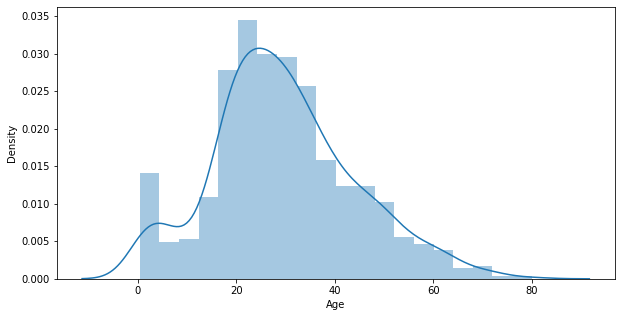

In [5]:
# 
plt.figure(figsize=(10,5))
sns.distplot(train['Age'])

**Most of people who are on the ship are between 20-40 years of age**

0    549
1    342
Name: Survived, dtype: int64


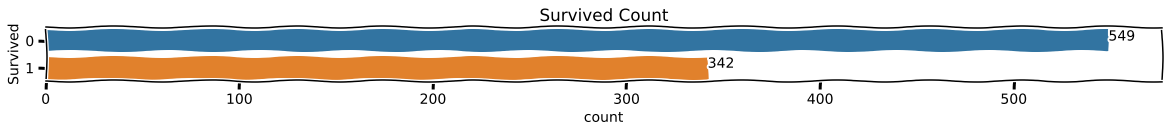

In [6]:
# How many people survived?
with plt.xkcd():
    fig = plt.figure(figsize=(20,1))
    sns.countplot(y='Survived', data=train);
    print(train.Survived.value_counts())
    
    y = train.Survived.value_counts()

    for index, count in enumerate(y):
        plt.text(count, index,
                 str(count))
    plt.title("Survived Count")

**Only 342 people has survived**

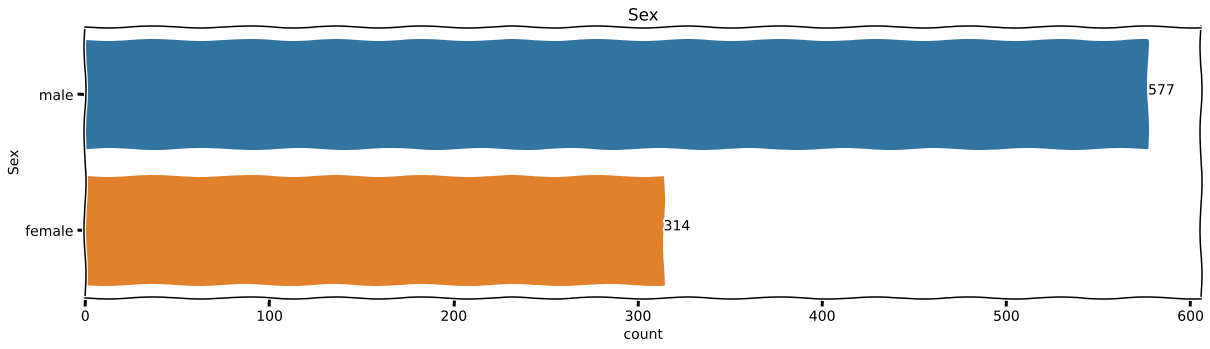

In [7]:
# Let's view the distribution of Sex
with plt.xkcd():
    plt.figure(figsize=(20, 5))
    sns.countplot(y="Sex", data=train)
    
     
    y = train.Sex.value_counts()

    for index, count in enumerate(y):
        plt.text(count, index,
                 str(count))
    
    plt.title("Sex")

<AxesSubplot:xlabel='Age', ylabel='Density'>

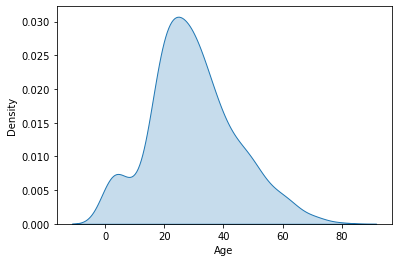

In [8]:
sns.kdeplot(data=train['Age'], shade=True)

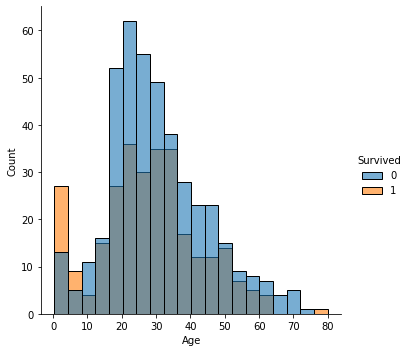

In [9]:
sns.displot(x='Age', hue='Survived', data=train, alpha=0.6)
plt.show()

## Preprocessing Data

In [10]:
null_values = train.isna().sum()
null_values[null_values>0]


Age         177
Cabin       687
Embarked      2
dtype: int64

In [11]:
train.drop("PassengerId", axis=1, inplace=True)

In [12]:
train.select_dtypes('object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [13]:
def preprocessing_data(df):
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.mean())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [14]:
train = preprocessing_data(df=train)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,109,2,22.000000,1,0,524,7.2500,0,3
1,1,1,191,1,38.000000,1,0,597,71.2833,82,1
2,1,3,354,1,26.000000,0,0,670,7.9250,0,3
3,1,1,273,1,35.000000,1,0,50,53.1000,56,3
4,0,3,16,2,35.000000,0,0,473,8.0500,0,3
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,549,2,27.000000,0,0,102,13.0000,0,3
887,1,1,304,1,19.000000,0,0,15,30.0000,31,3
888,0,3,414,1,29.699118,1,2,676,23.4500,0,3
889,1,1,82,2,26.000000,0,0,9,30.0000,61,1


In [15]:
train.drop(['Name','Ticket'], axis=1, inplace=True)

In [16]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,2,22.000000,1,0,7.2500,0,3
1,1,1,1,38.000000,1,0,71.2833,82,1
2,1,3,1,26.000000,0,0,7.9250,0,3
3,1,1,1,35.000000,1,0,53.1000,56,3
4,0,3,2,35.000000,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...,...
886,0,2,2,27.000000,0,0,13.0000,0,3
887,1,1,1,19.000000,0,0,30.0000,31,3
888,0,3,1,29.699118,1,2,23.4500,0,3
889,1,1,2,26.000000,0,0,30.0000,61,1


## Checking the Outliers

<AxesSubplot:xlabel='Age'>

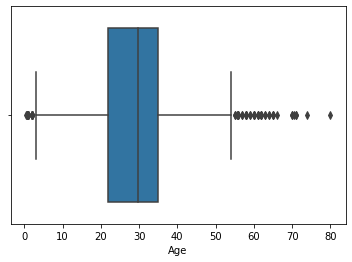

In [17]:
sns.boxplot(train['Age'])

## Modelling

In [18]:
# Import required libraries
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report




In [19]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("----Imabalanced Classification-----")
counter = Counter(y)
print(counter)

# transform
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
print("----Balanced Classification----")
counter = Counter(y)
print(counter)



----Imabalanced Classification-----
Counter({0: 549, 1: 342})
----Balanced Classification----
Counter({0: 549, 1: 549})


------Cross_validation_scores-----
Accuracy Score : 78.21%
Precision Score : 0.7536231884057971
Recall score : 0.7027027027027027
F1 Score : 0.7272727272727273

Classification Report :               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179





Text(0.5, 1.0, 'Confusion Matrix')

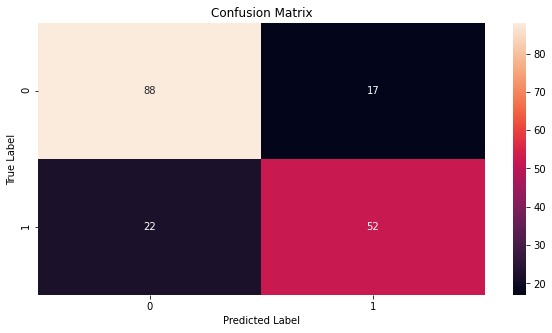

In [20]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_jobs=-1)
model1.fit(X_train, y_train)

y_preds = model1.predict(X_test)
y_preds

model1.score(X_test, y_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

------Cross_validation_scores-----
Accuracy Score : 78.77%
Precision Score : 0.7647058823529411
Recall score : 0.7027027027027027
F1 Score : 0.7323943661971832

Classification Report :               precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179





Text(0.5, 1.0, 'Confusion Matrix')

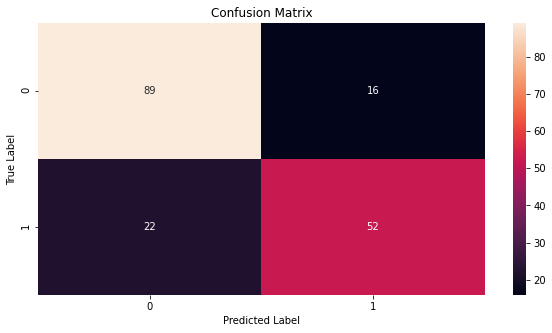

In [21]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

y_preds = model2.predict(X_test)
y_preds

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model2, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

------Cross_validation_scores-----
Accuracy Score : 82.12%
Precision Score : 0.8181818181818182
Recall score : 0.7297297297297297
F1 Score : 0.7714285714285715

Classification Report :               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179





Text(0.5, 1.0, 'Confusion Matrix')

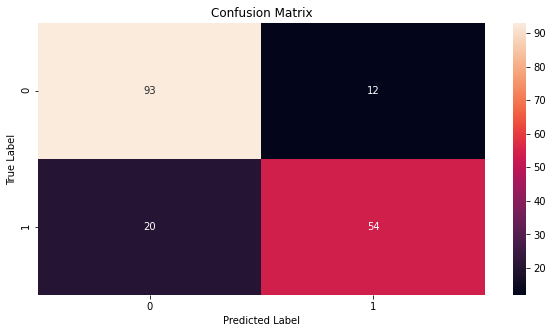

In [22]:
## Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(42)
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)

y_preds = model3.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model3, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

------Cross_validation_scores-----
Accuracy Score : 70.95%
Precision Score : 0.671875
Recall score : 0.581081081081081
F1 Score : 0.6231884057971013

Classification Report :               precision    recall  f1-score   support

           0       0.73      0.80      0.76       105
           1       0.67      0.58      0.62        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.71      0.71       179





Text(0.5, 1.0, 'Confusion Matrix')

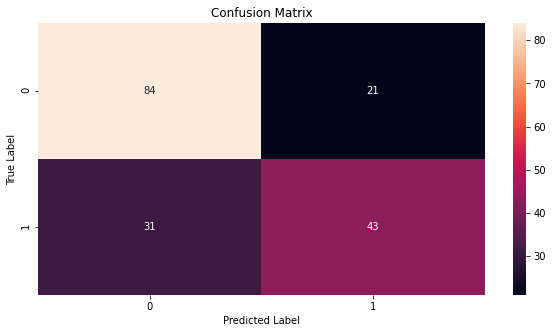

In [23]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)

y_preds = model4.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model4, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

------Cross_validation_scores-----
Accuracy Score : 82.12%
Precision Score : 0.8
Recall score : 0.7567567567567568
F1 Score : 0.7777777777777778

Classification Report :               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179





Text(0.5, 1.0, 'Confusion Matrix')

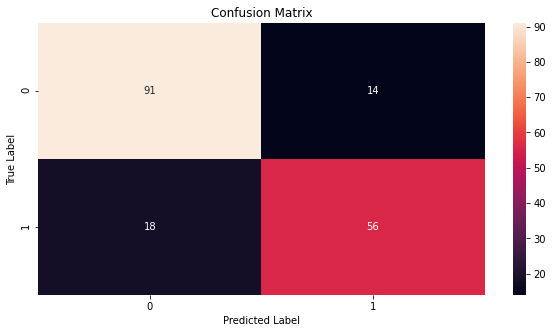

In [24]:
# LogisticRegression 
from sklearn.linear_model import LogisticRegression

np.random.seed(42)
model5 = LogisticRegression()
model5.fit(X_train, y_train)

y_preds = model5.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model5, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

[02:58:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------Cross_validation_scores-----
Accuracy Score : 79.89%
Precision Score : 0.7567567567567568
Recall score : 0.7567567567567568
F1 Score : 0.7567567567567567

Classification Report :               precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179





Text(0.5, 1.0, 'Confusion Matrix')

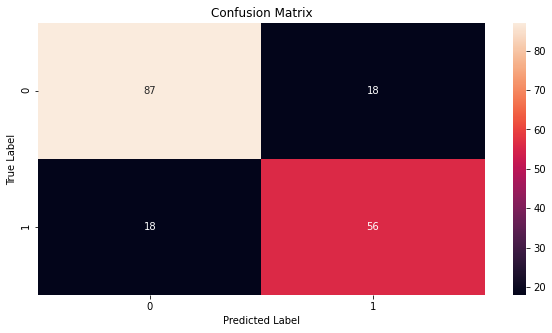

In [25]:
## XGB
from xgboost import XGBClassifier

np.random.seed(42)
model6 = XGBClassifier()
model6.fit(X_train, y_train)

y_preds = model6.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model6, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

------Cross_validation_scores-----
Accuracy Score : 82.68%
Precision Score : 0.8307692307692308
Recall score : 0.7297297297297297
F1 Score : 0.7769784172661871

Classification Report :               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179





Text(0.5, 1.0, 'Confusion Matrix')

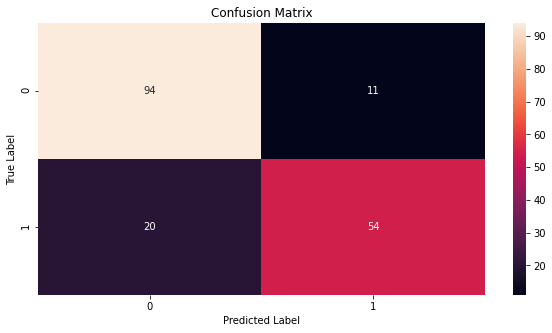

In [26]:
#Catboost
from catboost import CatBoostClassifier

np.random.seed(42)
model7 = CatBoostClassifier(verbose=0)
model7.fit(X_train, y_train)

y_preds = model7.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
score = np.mean(scores)

print("------Cross_validation_scores-----")
print(f"Accuracy Score : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision Score : {precision_score(y_test, y_preds)}")
print(f"Recall score : {recall_score(y_test, y_preds)}")
print(f"F1 Score : {f1_score(y_test, y_preds)}")
print()
print(f"Classification Report : {classification_report(y_test, y_preds)}")
print()
print()
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

In [27]:
y_preds = model7.predict(X_test)
y_preds


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [28]:
y_pred_proba = model7.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]
y_pred_proba

array([0.1609413 , 0.11823407, 0.16476422, 0.96409805, 0.58213955,
       0.96948842, 0.69510154, 0.07345818, 0.61844503, 0.97741546,
       0.29427857, 0.07463482, 0.17247513, 0.12529519, 0.10646215,
       0.97771936, 0.44329726, 0.68839653, 0.1042616 , 0.26211825,
       0.10471844, 0.17231182, 0.31463665, 0.10057709, 0.08536913,
       0.06696302, 0.16057159, 0.11983948, 0.17566896, 0.55274509,
       0.10186105, 0.50862955, 0.24030123, 0.64075404, 0.1217904 ,
       0.17698319, 0.25412038, 0.69510154, 0.96479033, 0.09599358,
       0.09451045, 0.11561977, 0.09880615, 0.13147376, 0.40619246,
       0.112436  , 0.11440195, 0.09033252, 0.14787686, 0.55283342,
       0.90025014, 0.98002784, 0.02531364, 0.72520492, 0.04288796,
       0.96918301, 0.13143293, 0.97712822, 0.9456559 , 0.58908266,
       0.13519269, 0.92036471, 0.9236803 , 0.15097396, 0.13147376,
       0.94406045, 0.12245662, 0.14584593, 0.20725804, 0.98429166,
       0.92025613, 0.96069205, 0.44398015, 0.98866806, 0.12614

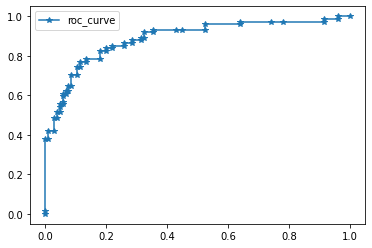

In [29]:
#ROC Curve
# Calculate the roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='*', label='roc_curve')
plt.legend()
plt.show()

## Import Test Set

In [30]:
test = pd.read_csv("../input/titanic/test.csv")
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test = test.drop(['Name', 'Ticket'], axis=1)

In [32]:
test = preprocessing_data(df=test)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,2,34.5,0,0,7.8292,0,2
1,893,3,1,47.0,1,0,7.0000,0,3
2,894,2,2,62.0,0,0,9.6875,0,2
3,895,3,2,27.0,0,0,8.6625,0,3
4,896,3,1,22.0,1,1,12.2875,0,3


In [33]:
# MOdelling
np.random.seed(42)
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_preds = model.predict(test)
y_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [34]:
data = pd.DataFrame()
data['PassengerId'] = test['PassengerId']
data['Survived'] = y_preds
data.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [35]:
data.to_csv('submission', index=False)